# Publishing packages as web layers

Packages in ArcGIS bundle maps, data, tools and cartographic information. ArcGIS lets you [create a variety of packages](http://pro.arcgis.com/en/pro-app/help/sharing/overview/introduction-to-sharing-packages.htm) such as map (.mpkx), layer (.lpkx), map tile (.tpk), vector tile (.vtpk), scene layer (.slpk), geoprocessing (.gpkx) packages etc. to name a few. You can share any of these packages with other users either as files on a network share or as items in your portal. In addition, some of these packages can be shared as web layers.

In this sample, we will observe how to publish web layers from tile, vector tile and scene layer packages. Data for this sample is available in the accompanying `data` folder.

## Publishing tile layers from a tile package

A [Tile package](http://pro.arcgis.com/en/pro-app/help/sharing/overview/tile-package.htm) contains a set of tiles (images) from a map or raster dataset. These tiles (also called as tile cache) can be used as basemaps and are useful for visualizing imagery or relatively static data.

In [1]:
# connect to the GIS
from arcgis.gis import GIS
gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")

Upload the tile package (USA_counties_divorce_rate.tpk) as an item. To keep our 'my contents' tidy, let us create a new folder called 'packages' and add to it.

In [7]:
gis.content.create_folder('packages')

{'id': '4c1b623fd54b4930981d14f05d131aa2',
 'title': 'packages',
 'username': 'arcgis_python'}

<Item title:"USA_counties_divorce_rate" type:Tile Package owner:arcgis_python>
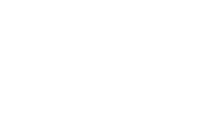

In [10]:
tpk_item = gis.content.add({}, data='data/USA_counties_divorce_rate.tpk', folder='packages')
tpk_item

Now, let us go ahead and publish this item as a tile layer

<Item title:"USA_counties_divorce_rate" type:Map Service owner:arcgis_python>
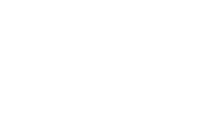

In [13]:
tile_layer = tpk_item.publish()
tile_layer

You can visualize the contents of the package using the tile layer as shown below. This layer compares the ratio of total number of households to the number of divorced from 2000 census data.

In [20]:
map1 = gis.map("USA")
map1.basemap = 'osm'
map1

In [21]:
map1.add_layer(tile_layer)